# Install Detectron2 and WandB

In [1]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install --quiet {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 1.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15725, done.
remote: Counting objects: 100% (448/448), done.
remote: Compressing objects: 100% (336/336), done.
remote: Total 15725 (delta 201), reused 296 (delta 103), pack-reused 15277
Receiving objects: 100% (15725/15725), 6.51 MiB | 6.95 MiB/s, done.
Resolving deltas: 100% (11316/11316), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 923.7 kB/s eta 0:

In [2]:
!pip install wandb -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.5 MB/s eta 0:00:00


In [2]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.3 ; cuda:  cu121
detectron2: 0.6


In [4]:
# Log in to your W&B account
import wandb
wandb.login(key='c38c9f654758a38d96d742093ca6d43cd173c004')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [13]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

# Initialize W&B project and register datasets

In [11]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("train_ds", {}, "/content/drive/MyDrive/diopsis_coco_split_flowers/dataset_yoloSplit/train/labels/train/train.json", "/content/drive/MyDrive/diopsis_coco_split_flowers/dataset_yoloSplit/train/images/train")
register_coco_instances("val_ds", {}, "/content/drive/MyDrive/diopsis_coco_split_flowers/dataset_yoloSplit/val/labels/train/val.json", "/content/drive/MyDrive/diopsis_coco_split_flowers/dataset_yoloSplit/val/images/train")


In [14]:
train_metadata = MetadataCatalog.get("train_ds")
train_dataset_dicts = DatasetCatalog.get("train_ds")

[06/10 10:49:45 d2.data.datasets.coco]: Loading /content/drive/MyDrive/diopsis_coco_split_flowers/dataset_yoloSplit/train/labels/train/train.json takes 2.43 seconds.
[06/10 10:49:45 d2.data.datasets.coco]: Loaded 1898 images in COCO format from /content/drive/MyDrive/diopsis_coco_split_flowers/dataset_yoloSplit/train/labels/train/train.json


In [ ]:
val_metadata = MetadataCatalog.get("val_ds")
val_dataset_dicts = DatasetCatalog.get("val_ds")

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# Visualize some random samples
for d in random.sample(train_dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=1)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image())
    plt.show()

In [ ]:
# Visualize some random samples
for d in random.sample(val_dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=1)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image())
    plt.show()

In [ ]:
# Initialize WandB project
wandb.init(project="Insect Detect - Detectron2 X101", entity="kalinkov")

# Create a config file
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
# cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_C4_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_ds",)
cfg.DATALOADER.NUM_WORKERS = 8
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_C4_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 9000  # Adjust as needed
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 85  # Adjust for your dataset
cfg.OUTPUT_DIR = "/content/drive/MyDrive/diopsis_coco_split_flowers/results"
# Size of the smallest side of the image during training
cfg.INPUT.MIN_SIZE_TRAIN = (770,)
# Sample size of smallest side by choice or random selection from range give by
# INPUT.MIN_SIZE_TRAIN
# Maximum size of the side of the image during training
cfg.INPUT.MAX_SIZE_TRAIN = 1026
# Size of the smallest side of the image during testing. Set to zero to disable resize in testing.
cfg.INPUT.MIN_SIZE_TEST = 770
# Maximum size of the side of the image during testing
cfg.INPUT.MAX_SIZE_TEST = 1026

# Integrate WandB with Detectron2 config
cfg.WANDB_PROJECT = "Insect Detect - Detectron2 X101"
# cfg.WANDB_ENTITY = "kalinkov"

In [ ]:
from detectron2.engine import HookBase
from detectron2.data import build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

class WandbHook(HookBase):
    def __init__(self):
        super().__init__()

    def after_step(self):
        metrics = {
            "loss": self.trainer.storage.history("total_loss").latest()
        }
        wandb.log(metrics)

    def after_epoch(self):
        # Evaluate on validation set
        evaluator = COCOEvaluator("val_ds", cfg, False, output_dir="./output/")
        val_loader = build_detection_test_loader(cfg, "val_ds")
        val_results = inference_on_dataset(self.trainer.model, val_loader, evaluator)
        validation_loss = val_results['bbox']['AP']  # Example metric, adjust to your needs
        wandb.log({"validation_loss": validation_loss})

# Add WandbHook to the trainer
class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        return COCOEvaluator(dataset_name, cfg, True, output_folder)

    def build_hooks(self):
        hooks = super().build_hooks()
        hooks.insert(-1, WandbHook())
        return hooks

# # Set up the trainer and train
# cfg.DATASETS.TRAIN = ("train_ds",)
# cfg.DATASETS.TEST = ("val_ds",)  # Use validation dataset for evaluation during training

trainer = Trainer(cfg)
trainer.resume_or_load(resume=False)


In [ ]:
trainer.train()

[06/05 23:00:42 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/05 23:02:17 d2.utils.events]:  eta: 9:45:20  iter: 19  total_loss: 7.417  loss_cls: 4.386  loss_box_reg: 0.1655  loss_rpn_cls: 2.491  loss_rpn_loc: 0.254    time: 3.9198  last_time: 4.0281  data_time: 0.6312  last_data_time: 0.0088   lr: 4.9953e-06  max_mem: 10433M
[06/05 23:03:40 d2.utils.events]:  eta: 9:49:55  iter: 39  total_loss: 5.32  loss_cls: 4.169  loss_box_reg: 0.1624  loss_rpn_cls: 0.6913  loss_rpn_loc: 0.235    time: 3.9472  last_time: 3.9862  data_time: 0.0097  last_data_time: 0.0091   lr: 9.9902e-06  max_mem: 10433M
[06/05 23:05:00 d2.utils.events]:  eta: 9:51:02  iter: 59  total_loss: 4.403  loss_cls: 3.843  loss_box_reg: 0.2058  loss_rpn_cls: 0.1428  loss_rpn_loc: 0.2648    time: 3.9585  last_time: 4.0110  data_time: 0.0098  last_data_time: 0.0112   lr: 1.4985e-05  max_mem: 10433M
[06/05 23:06:20 d2.utils.events]:  eta: 9:51:09  iter: 79  total_loss: 4.02  loss_cls: 3.333  loss_box_reg: 0.2654  loss_rpn_cls: 0.09567  loss_rpn_loc: 0.3149    time: 3.9671  last_time: 

In [14]:
# Evaluate on the test dataset
evaluator = COCOEvaluator("val_ds", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "val_ds")
inference_on_dataset(trainer.model, val_loader, evaluator)

[06/10 10:30:10 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [06/10 10:30:10 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/10 10:30:10 d2.data.datasets.coco]: Loaded 1306 images in COCO format from /content/drive/MyDrive/diopsis_coco_split_flowers/dataset_yoloSplit/val/labels/train/val.json
[06/10 10:30:10 d2.data.build]: Distribution of instances among all 85 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
|   Acrididae   | 2            |    Agapeta    | 0            | Agapeta ham.. | 22           |
|   Animalia    | 20           | Anisopodidae  | 0            |   Aphididae   | 90           |
|    Apidae     | 6            |   Arachnida   | 5            |    Araneae    | 9

/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/10 10:30:23 d2.evaluation.evaluator]: Inference done 11/1306. Dataloading: 0.1340 s/iter. Inference: 0.2508 s/iter. Eval: 0.0001 s/iter. Total: 0.3849 s/iter. ETA=0:08:18
[06/10 10:30:28 d2.evaluation.evaluator]: Inference done 26/1306. Dataloading: 0.0480 s/iter. Inference: 0.3075 s/iter. Eval: 0.0001 s/iter. Total: 0.3562 s/iter. ETA=0:07:35
[06/10 10:30:34 d2.evaluation.evaluator]: Inference done 37/1306. Dataloading: 0.0595 s/iter. Inference: 0.3406 s/iter. Eval: 0.0004 s/iter. Total: 0.4013 s/iter. ETA=0:08:29
[06/10 10:30:39 d2.evaluation.evaluator]: Inference done 53/1306. Dataloading: 0.0575 s/iter. Inference: 0.3181 s/iter. Eval: 0.0004 s/iter. Total: 0.3768 s/iter. ETA=0:07:52
[06/10 10:30:44 d2.evaluation.evaluator]: Inference done 70/1306. Dataloading: 0.0454 s/iter. Inference: 0.3094 s/iter. Eval: 0.0003 s/iter. Total: 0.3561 s/iter. ETA=0:07:20


KeyboardInterrupt: 

In [20]:
from detectron2.checkpoint import DetectionCheckpointer

In [21]:
checkpointer = DetectionCheckpointer(trainer.model, save_dir=cfg.OUTPUT_DIR)

In [24]:
f = open('config.yml','w')
f.write(cfg.dump())
f.close()

In [19]:
# # Save model weights
# trainer.save_model(cfg.OUTPUT_DIR + "/model_final.pth")

# Load model weights for inference
# cfg.MODEL.WEIGHTS = cfg.OUTPUT_DIR + "/model_final.pth"
cfg.MODEL.WEIGHTS = cfg.OUTPUT_DIR + "/model_0004999.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[06/10 10:32:47 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/diopsis_coco_split_flowers/results/model_0004999.pth ...


In [ ]:
evaluator = COCOEvaluator("val_ds", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "val_ds")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[06/05 22:08:43 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
[06/05 22:08:43 d2.data.datasets.coco]: Loaded 1306 images in COCO format from /content/drive/MyDrive/diopsis_coco_split_flowers/dataset_yoloSplit/val/labels/train/val.json
[06/05 22:08:43 d2.data.build]: Distribution of instances among all 85 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
|   Acrididae   | 2            |    Agapeta    | 0            | Agapeta ham.. | 22           |
|   Animalia    | 20           | Anisopodidae  | 0            |   Aphididae   | 90           |
|    Apidae     | 6            |   Arachnida   | 5            |    Araneae    | 99           |
|   Arctiidae   | 8            | Auchenorrhy.. | 102          |   Baetidae    | 3            |
|    Cabera     | 0            |   Caenidae    | 1926        

[06/10 11:19:08 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/diopsis_coco_split_flowers/results/model_0004999.pth ...


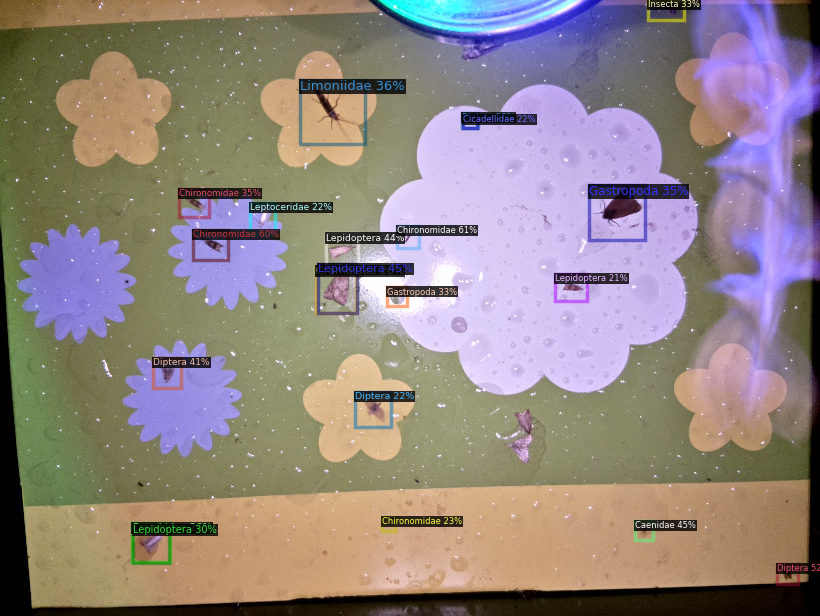

In [64]:
import cv2
from google.colab.patches import cv2_imshow
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer, ColorMode
import matplotlib.pyplot as plt

cfg = get_cfg()
cfg.merge_from_file('/content/drive/MyDrive/diopsis_coco_split_flowers/results/config.yml')
cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/diopsis_coco_split_flowers/results/model_0004999.pth'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2
# cfg.DATASETS.TRAIN = ("train_ds",)
predictor = DefaultPredictor(cfg)

im = cv2.imread('/content/drive/MyDrive/diopsis_test_images/20230716001703.jpg')
outputs = predictor(im)

thing_classes = {'thing_classes':['Acrididae',
                         'Agapeta',
                         'Agapeta hamana',
                         'Animalia',
                         'Anisopodidae',
                         'Aphididae',
                         'Apidae',
                         'Arachnida',
                         'Araneae',
                         'Arctiidae',
                         'Auchenorrhyncha indet.',
                         'Baetidae',
                         'Cabera',
                         'Caenidae',
                         'Carabidae',
                         'Cecidomyiidae',
                         'Ceratopogonidae',
                         'Cercopidae',
                         'Chironomidae',
                         'Chrysomelidae',
                         'Chrysopidae',
                         'Chrysoteuchia culmella',
                         'Cicadellidae',
                         'Coccinellidae',
                         'Coleophoridae',
                         'Coleoptera',
                         'Collembola',
                         'Corixidae',
                         'Crambidae',
                         'Culicidae',
                         'Curculionidae',
                         'Dermaptera',
                         'Diptera',
                         'Eilema',
                         'Empididae',
                         'Ephemeroptera',
                         'Erebidae',
                         'Fanniidae',
                         'Formicidae',
                         'Gastropoda',
                         'Gelechiidae',
                         'Geometridae',
                         'Hemiptera',
                         'Hydroptilidae',
                         'Hymenoptera',
                         'Ichneumonidae',
                         'Idaea',
                         'Insecta',
                         'Lepidoptera',
                         'Leptoceridae',
                         'Limoniidae',
                         'Lomaspilis marginata',
                         'Miridae',
                         'Mycetophilidae',
                         'Nepticulidae',
                         'Neuroptera',
                         'Noctuidae',
                         'Notodontidae',
                         'Object',
                         'Opiliones',
                         'Orthoptera',
                         'Panorpa germanica',
                         'Panorpa vulgaris',
                         'Parasitica indet.',
                         'Plutellidae',
                         'Psocodea',
                         'Psychodidae',
                         'Pterophoridae',
                         'Pyralidae',
                         'Pyrausta',
                         'Sepsidae',
                         'Spilosoma',
                         'Staphylinidae',
                         'Stratiomyidae',
                         'Syrphidae',
                         'Tettigoniidae',
                         'Tipulidae',
                         'Tomoceridae',
                         'Tortricidae',
                         'Trichoptera',
                         'Triodia sylvina',
                         'Yponomeuta',
                         'Yponomeutidae']}

v = Visualizer(im[:, :, ::-1],
               thing_classes,
               scale=0.5)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

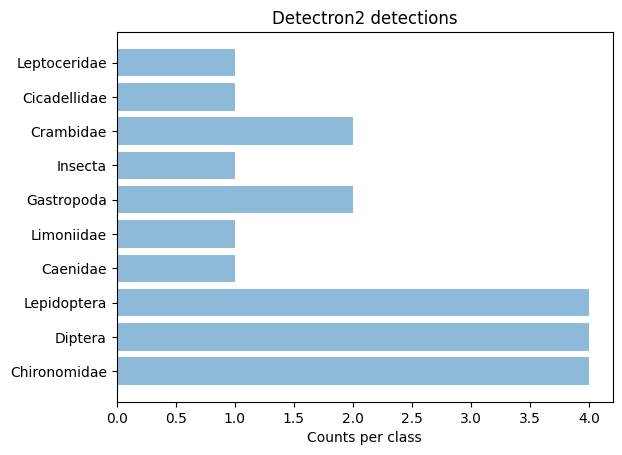

In [109]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

def _create_text_labels(classes, class_names):
    labels = None
    if classes is not None:
        if class_names is not None and len(class_names) > 0:
            labels = [class_names[i] for i in classes]
        else:
            labels = [str(i) for i in classes]
    return labels

scores = outputs['instances'].to('cpu').scores if outputs['instances'].to('cpu').has("scores") else None
classes = outputs['instances'].to('cpu').pred_classes.tolist() if outputs['instances'].to('cpu').has("pred_classes") else None
labels = _create_text_labels(classes, thing_classes['thing_classes'])

letter_counts = Counter(labels)

classes = letter_counts.keys()
y_pos = np.arange(len(classes))
frequencies = [letter_counts[k] for k in classes]

plt.barh(y_pos, frequencies, align='center', alpha=0.5)
plt.yticks(y_pos, classes)
plt.xlabel('Counts per class')
plt.title('Detectron2 detections')

plt.show()

In [23]:
import detectron2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo

# Create a config file
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.OUTPUT_DIR = "/content/drive/MyDrive/diopsis_coco_split_flowers/results"

# Load model weights for inference
cfg.MODEL.WEIGHTS = cfg.OUTPUT_DIR + "/model_0004999.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

# Run inference
im = cv2.imread("/content/drive/MyDrive/diopsis_test_images/20230716001703.jpg")
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

In [17]:
# Run inference
im = cv2.imread("/content/drive/MyDrive/DIOPSIS/DIOPSIS_images/2023-08-10/756/20230810140356.jpg")
outputs = predictor(im)

In [18]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.